In [1]:
import cv2
import h5py
import numpy as np
import re
import tensorflow as tf

from matplotlib import pyplot as plt
from tensorflow.keras.models import Model
from keras.backend.tensorflow_backend import set_session

Using TensorFlow backend.


In [2]:
QUESTION_FILE_PATH = "/media/tomaszk/DANE/Speech_archive/HTS-demo_AMU_PL_ILO_STRAIGHT/data/questions/questions_qst001.hed"

In [3]:
with open(QUESTION_FILE_PATH) as qst_file:
    questions = qst_file.readlines()

In [4]:
qst_name_regexp = re.compile("QS\s+[^<>=]+")  

In [5]:
inputFeatureNames = [re.sub("[\t\n]", "",  re.sub('\"(.*)\"', "\g<1>", line)) for line in questions]      

In [6]:
inputFeatureNames.append("VUV")

In [7]:
inputFeatureNames = [line for line in inputFeatureNames if line]

In [8]:
suprasegmentals_indexes = [
    inputFeatureNames.index(feat) for feat in inputFeatureNames
    if not feat.startswith("QS LL") and
    not feat.startswith("QS RR") and
    not feat.startswith("QS L") and
    not feat.startswith("QS R") and
    not feat.startswith("QS C")
]
suprasegmental_labels = [inputFeatureNames[idx] for idx in suprasegmentals_indexes]

In [9]:
serviceOutput = h5py.File("output.hdf5", "r")

In [10]:
inputData = np.array(serviceOutput['inputLayer'])
data_keys = [key for key in serviceOutput['data'].keys()]

In [11]:
plt.close()
fig = plt.figure()

<Figure size 432x288 with 0 Axes>

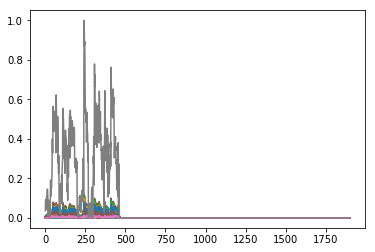

In [12]:
cmaps = [
    'Greys', 'Purples', 'Blues', 'Greens', 'Oranges', 'Reds',
    'YlOrBr', 'YlOrRd', 'OrRd', 'PuRd', 'RdPu', 'BuPu',
    'GnBu', 'PuBu', 'YlGnBu', 'PuBuGn', 'BuGn', 'YlGn']
current_cmap = 0
current_color = 0
prev_feat = None
for idx in suprasegmentals_indexes:
    inputFeature = inputData[idx, :]
    inputFeatureName = inputFeatureNames[idx]
    if prev_feat is not None and re.search(qst_name_regexp, inputFeatureName) != re.search(qst_name_regexp, prev_feat).group():
        current_color = 0
        if current_cmap >= len(cmaps):
            current_cmap = 0
        else:
            current_cmap += 1
    prev_feat = inputFeatureName
    # saliency = np.array(data[-1][0][saliencyMapIdx])[idx, :]
    # TODO - we need to plot all filters
    saliency = serviceOutput['data'][data_keys[-1]]['0']\
        ['saliencyMap'][idx, :]
    plt.plot(saliency, label=inputFeatureNames[idx])
#     plt.legend(loc='center left', bbox_to_anchor=(1, 0.5))
